In [9]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

final Tl atoms: 20
final Pb atoms 980


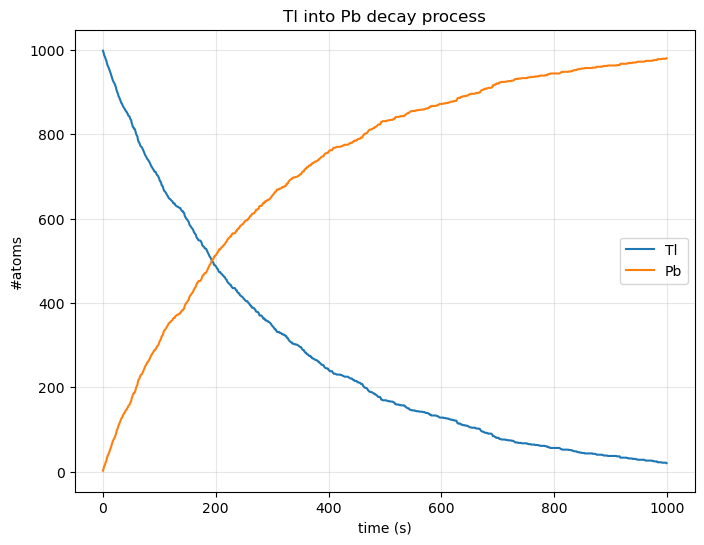

In [2]:
tau = 3.052 # min
tau = tau*60 # sec

t_min = 0 # sec
t_max = 10**3 # sec
time_step = 1 # sec
time = np.arange(t_min, t_max, time_step)

Tl = 1000 # initial Tl atoms
Tl_decayed = []

Pb = 0 # initial Pb atoms
Pb_formed = []

# decay process
for t in time:
    p = 1-m.exp2(-time_step/tau) 
    u = np.random.random(Tl)
    decayed = np.sum(u<p)
    Tl = Tl - decayed
    Pb = Pb + decayed
    Tl_decayed.append(Tl)
    Pb_formed.append(Pb)

print("final Tl atoms:", Tl)
print("final Pb atoms", Pb)

# plot
fig,ax = plt.subplots(figsize = (8,6))
ax.grid(alpha = 0.3)

ax.plot(time, Tl_decayed, label='Tl', marker='', linestyle='-')
ax.plot(time, Pb_formed, label='Pb', marker='', linestyle='-')

ax.set_xlabel('time (s)')
ax.set_ylabel('#atoms')
ax.set_title('Tl into Pb decay process')
ax.legend()

plt.show()

In [3]:
# pdf
def decay_pdf(t,tau):
    return 2**(-t/tau)*m.log(2)/tau

# cdf
def decay_quantile(z,tau):
    return -tau*m.log2(1-z)

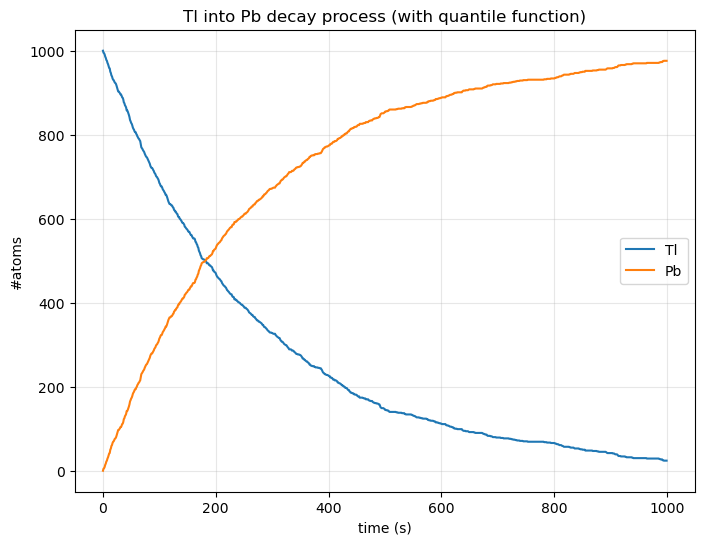

In [4]:
N = 1000
z = np.random.random(N)
decay_times = np.array([decay_quantile(k, tau) for k in z])

survived_Tl = []
formed_Pb = []

for t in time:
    survived = decay_times[decay_times>t].shape[0]
    survived_Tl.append(survived)
    formed_Pb.append(N-survived)

fig,ax = plt.subplots(figsize=(8,6))
ax.grid(alpha=0.3)

ax.plot(time, survived_Tl, label = 'Tl')
ax.plot(time, formed_Pb, label = 'Pb')
ax.legend()
ax.set_xlabel('time (s)')
ax.set_ylabel('#atoms')
ax.set_title('Tl into Pb decay process (with quantile function)')

plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Compute the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [5]:
def scattering_angle(b):
    Z = 79
    e = 1.602*10**(-19)
    e0 = 8.854*10**(-12)
    E = 7.7*10**(6)*e
    num = Z*e**2
    den = 2*m.pi*e0*E*b
    return num/den

In [6]:
# beam
N = 10**6

sigma = 5.2917*10**(-11)/100
cov = np.array([[sigma**2,0],[0,sigma**2]])
beam = np.random.multivariate_normal(mean=[0,0], cov=cov, size=N)

# impact parameters
b = np.sqrt(beam[:,0]**2+beam[:,1]**2)

# scattering angles/2 tangents
tans = scattering_angle(b)

# bouncing back particles 
bbp = beam[tans>1]
bbp_frac = bbp.shape[0] * 100/N

print(f'Bouncing back particles fraction: {bbp_frac:.4f}%')
print(f'Threshold impact parameter: {np.max(b[tans>1]):.3e} m')

Bouncing back particles fraction: 0.1548%
Threshold impact parameter: 2.951e-14 m


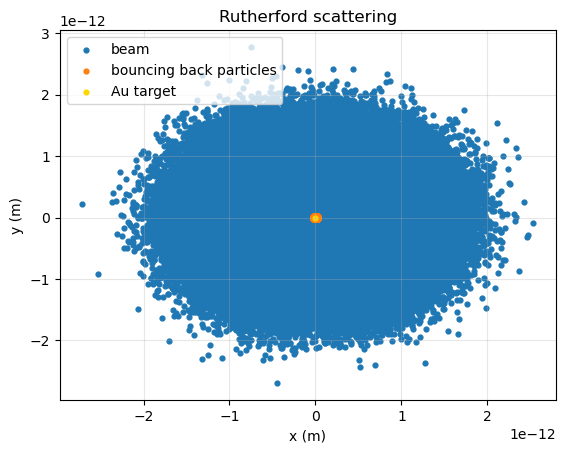

In [7]:
# scattering plot
fig, ax = plt.subplots()
ax.grid(alpha=0.3)

markersize = 12

ax.scatter(beam[:,0], beam[:,1], label = 'beam', s=markersize)
ax.scatter(bbp[:,0], bbp[:,1], label = 'bouncing back particles', s=markersize)
ax.scatter(0,0, label='Au target', color = 'gold', s=markersize)

ax.legend(loc='upper left')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Rutherford scattering')

plt.show()

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [8]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

In [9]:
# hit-miss
N=10**6
count=0
sum = 0
sum_sq = 0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): 
        count+=1
I=2*count/N
p = I/2
err = 2*np.sqrt(N*p*(1-p))/N # variance of count (binomial distribution)
print(f'Integral value with hit/miss method: {I:.4f} ± {err:.4f}')

Integral value with hit/miss method: 1.4501 ± 0.0009


In [10]:
# mean
f_val = f(2*np.random.random(N))
f_mean = np.mean(f_val)
I_mean = 2*f_mean
print(f'Integral value with mean value method: {I_mean:.4f} ± {2*np.std(f_val)/np.sqrt(N):.4f}')

Integral value with mean value method: 1.4513 ± 0.0005


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [11]:
def f_area(x):
    if np.sum(x**2) <= 1:
        return 1
    else:
        return 0

In [12]:
def volume(n_dim, N=10**6):
    V = 2**n_dim
    counts = 0
    for i in range(N):
        u = np.random.random(n_dim)
        f = f_area(u)
        # hit/miss method
        if f == 1:
            counts += 1

    I_area = V * counts / N

    print('Number of dimensions:', n_dim)
    print(f'Integral value: {I_area:.4f}')

In [13]:
volume(2)

Number of dimensions: 2
Integral value: 3.1443


In [14]:
volume(3)

Number of dimensions: 3
Integral value: 4.1858


In [16]:
volume(10)

Number of dimensions: 10
Integral value: 2.5723


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [36]:
def w_func(x):
    return x**(-1/2)

def quantile_w(x):
    return x*x  # should be x*x/4 but it does not work 
                # (in this way it would work with w = 0.5*x**(-1/2))

def my_func(x):
    return x**(-1/2)/(np.exp(x)+1)

In [37]:
N = 10**6

# integral of w(x) in [0,1]
w_int = 2

# we want to sample numbers from a pdf given by w (and defined of course in [0,1])
# to sample from a custom pdf we use the inverse transform method
x = quantile_w(np.random.random(N))
val = my_func(x)/w_func(x)
mean_val = np.mean(val)
I = mean_val * w_int

print(f'Integral value with importance sampling: {I:.4f}')

Integral value with importance sampling: 0.8390
